<a href="https://colab.research.google.com/github/RafaelHPS/QuarentenaDados/blob/master/QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Aula 01


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes


In [0]:
movies = pd.read_csv("https://raw.githubusercontent.com/RafaelHPS/QuarentenaDados01/master/Arquivos_MovieLens/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/RafaelHPS/QuarentenaDados01/master/Arquivos_MovieLens/ratings.csv")

In [0]:
contagem_notas = ratings[['userId']].groupby(ratings['movieId']).count()
contagem_notas.columns = ["countRating"]

In [6]:
contagem_notas.head()

,countRating
movieId,
1,215
2,110
3,52
4,7
5,49


In [0]:
movies_with_count = movies.join(contagem_notas, on="movieId")

In [0]:
valores_nulos = pd.isnull(movies_with_count["countRating"]) 

filmes_sem_voto = movies_with_count[valores_nulos]

In [9]:
quantidade_filmes_sem_voto = filmes_sem_voto["movieId"].count()

print("A quantidade de filmes sem voto é : ",quantidade_filmes_sem_voto)

A quantidade de filmes sem voto é :  18


In [10]:
filmes_sem_voto

,movieId,title,genres,countRating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [11]:
notas_medias_por_filme = ratings.groupby("movieId")["rating"].mean()
notas_medias_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [12]:
filmes_com_media = movies.join(notas_medias_por_filme, on="movieId")
filmes_com_media.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [13]:
filmes_com_media.columns = ["movieId","title","genres","nota_media"]
filmes_com_media.head()

,movieId,title,genres,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [14]:
movies_with_count.head()

,movieId,title,genres,countRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.


In [0]:
filmes_com_media_arredondada = filmes_com_media.copy(False)
filmes_com_media_arredondada.columns = ["movieId","title","genres","nota_media_arredondada"]

In [0]:
filmes_com_media_arredondada["nota_media_arredondada"] = filmes_com_media_arredondada["nota_media_arredondada"].map('{:,.2f}'.format)


In [17]:
filmes_com_media_arredondada.head()

,movieId,title,genres,nota_media_arredondada
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
generos = pd.DataFrame(movies["genres"].str.split("|").tolist(),index=movies["movieId"]).stack()
generos = generos.reset_index([0, 'movieId'])
generos.columns = ['movieId', 'genres']
generos_unicos = pd.DataFrame(generos['genres'].unique().tolist())
generos_unicos = generos_unicos.reset_index()
generos_unicos.columns = ["genreId","genre"]

In [19]:
generos_unicos

,genreId,genre
0,0,Adventure
1,1,Animation
2,2,Children
3,3,Comedy
4,4,Fantasy
5,5,Romance
6,6,Drama
7,7,Action
8,8,Crime
9,9,Thriller


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
contagem_generos = generos[['movieId']].groupby(generos['genres']).count()
contagem_generos.columns = ["countGenres"]
contagem_generos = contagem_generos.reset_index([0, 'genres'])
contagem_generos.columns = ['genres', 'countGenres']

In [21]:
contagem_generos.sort_values("countGenres",ascending=False)

,genres,countGenres
8,Drama,4361
5,Comedy,3756
17,Thriller,1894
1,Action,1828
15,Romance,1596
2,Adventure,1263
6,Crime,1199
16,Sci-Fi,980
11,Horror,978
9,Fantasy,779


## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

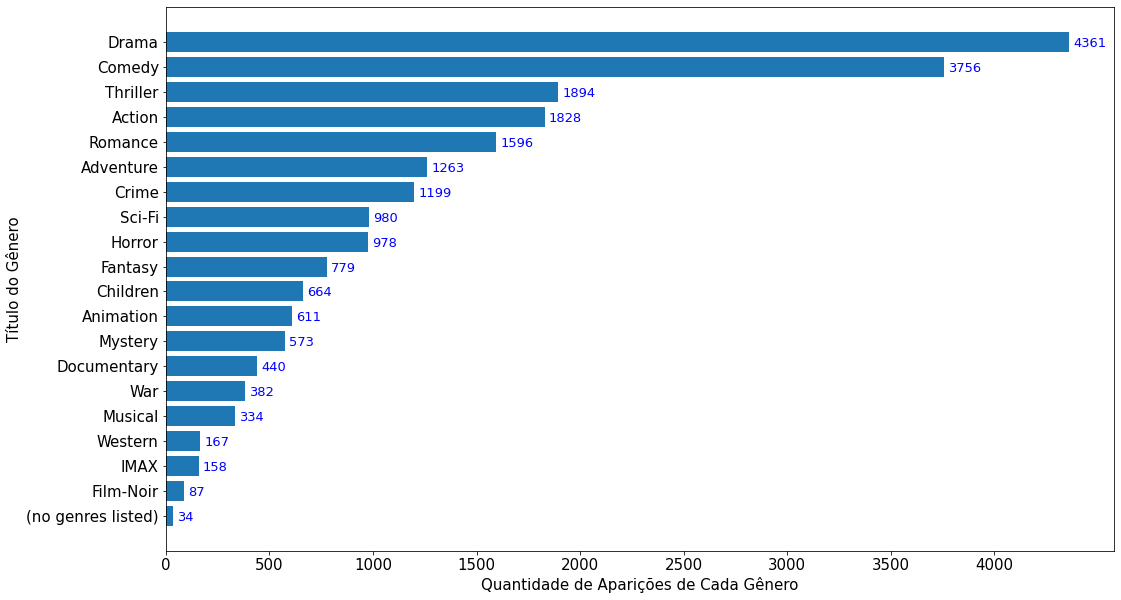

In [22]:
plt.rcParams['figure.figsize'] = (17,10)

contagem_generos = contagem_generos.sort_values('countGenres',ascending=True)

y_pos = np.arange(len(contagem_generos["countGenres"]))

x_pos = np.arange(max(contagem_generos["countGenres"]),step=500)

plt.barh(y_pos, contagem_generos["countGenres"])

plt.yticks(y_pos, contagem_generos["genres"],fontsize=15)
plt.xticks(x_pos,fontsize=15)
# naming the x-axis 
plt.xlabel('Quantidade de Aparições de Cada Gênero', fontsize=15) 
# naming the y-axis 
plt.ylabel('Título do Gênero',fontsize=15) 
# plot title 

for i, v in enumerate(contagem_generos["countGenres"]):
  plt.text(v + 20, i - 0.2, str(v), color='blue', fontsize=13)




plt.show() 

# Aula 02

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

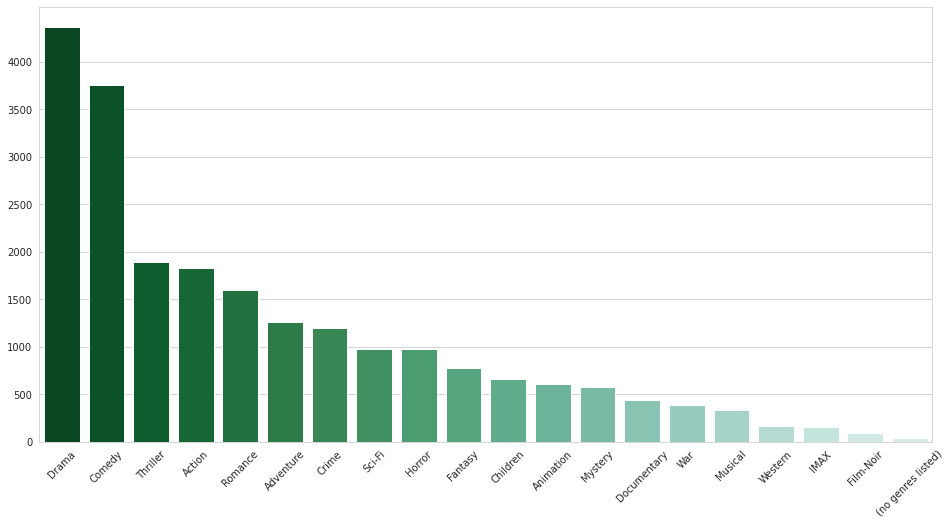

In [23]:
sns.set_style("whitegrid")

contagem_generos = movies["genres"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))

labels_y = np.arange(max(contagem_generos.values),step=500)

plot_generos = sns.barplot(x=contagem_generos.index,
                     y=contagem_generos.values,
                     palette=sns.color_palette("BuGn_r", n_colors=len(contagem_generos) + 4))

plot_generos.set_xticklabels(plot_generos.get_xticklabels(),rotation=45)

plot_generos.set_yticks(labels_y)
         
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
def plot_filme(n):
  fig, axs = plt.subplots(1,3,figsize=(20,8))
  
  #fig,(axs,tabax) = plt.subplots(ncols=2, gridspec_kw=dict(width_ratios=[2,1]))
  
  #plt.figure(figsize=(8,10))
  notas_do_filme = ratings.query(f"movieId=={n}")
  plot_hist = notas_do_filme.plot(kind='hist',x="movieId",y="rating",ax=axs[0])
  plot_hist.set_xlabel('Notas')
  
  #plt.figure(figsize=(8,10))
  #plot_box = notas_do_filme.plot.box(ax=axs[1])
  
  nome_do_filme = movies.query(f"movieId=={n}")["title"]
  plot_box = sns.boxplot(data = notas_do_filme, x="movieId", y="rating",ax=axs[1])
  plot_box.set_xlabel("Filme", fontsize=16)
  plot_box.set_ylabel("Nota", fontsize=16)
  plot_box.set_xticklabels(nome_do_filme)

  summary = notas_do_filme["rating"].describe().to_frame()
  plot_table = axs[2].table(cellText=summary.values,
          rowLabels=summary.index,
          colLabels=["Descricao Coluna Notas"],
          cellLoc = 'right', rowLoc = 'right',
          loc='center')
  axs[2].axis("off") 

  plt.show()
  print('\n')
  return 

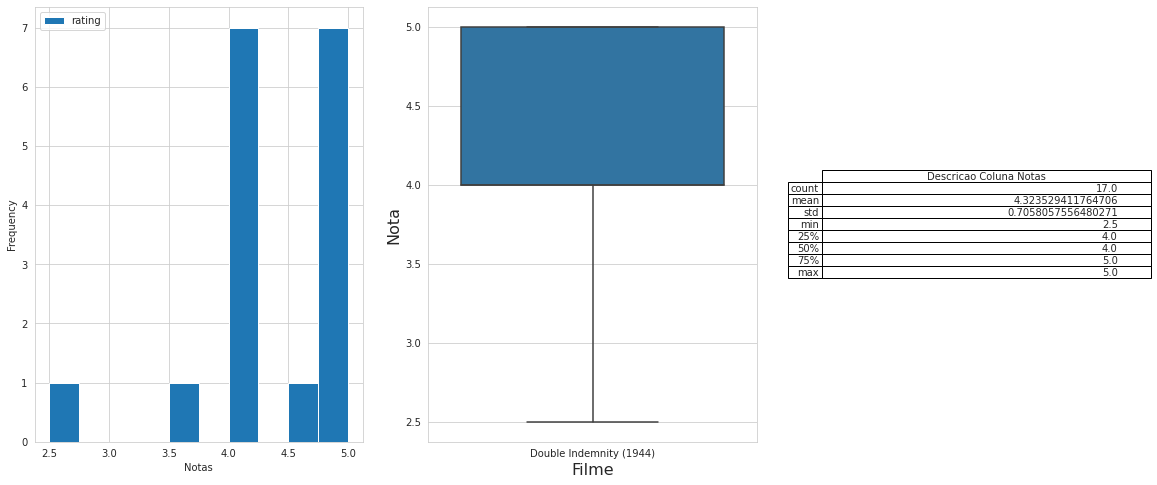

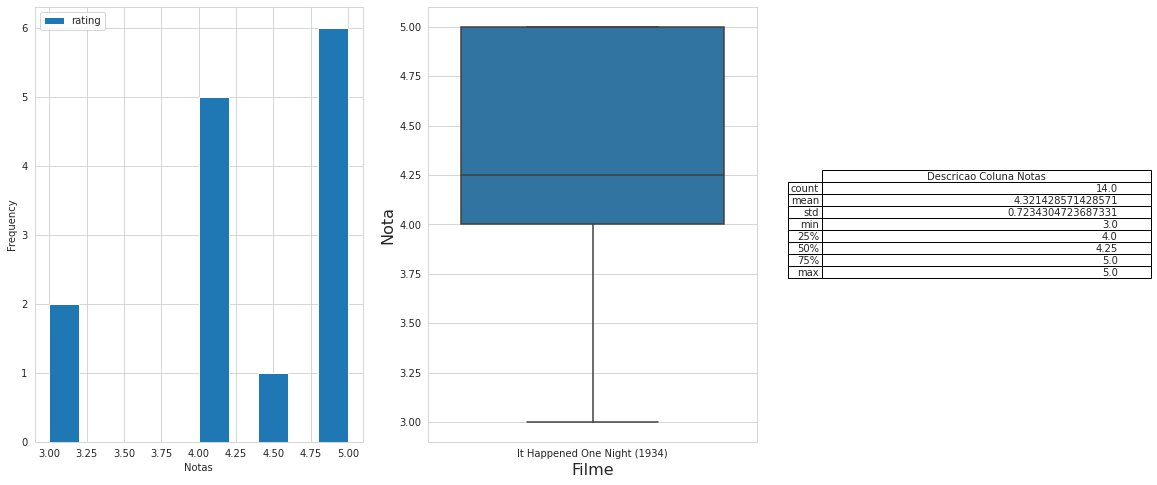

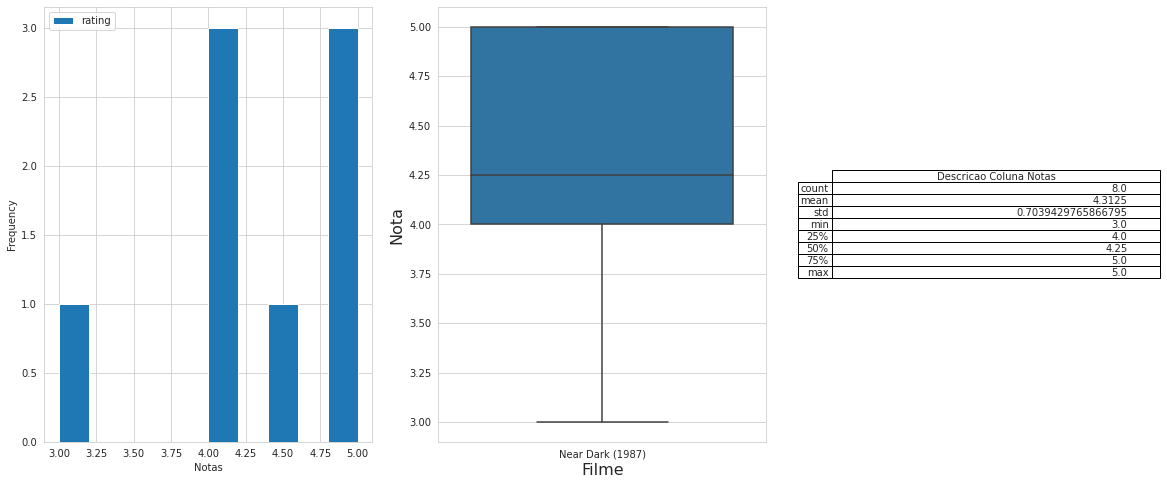

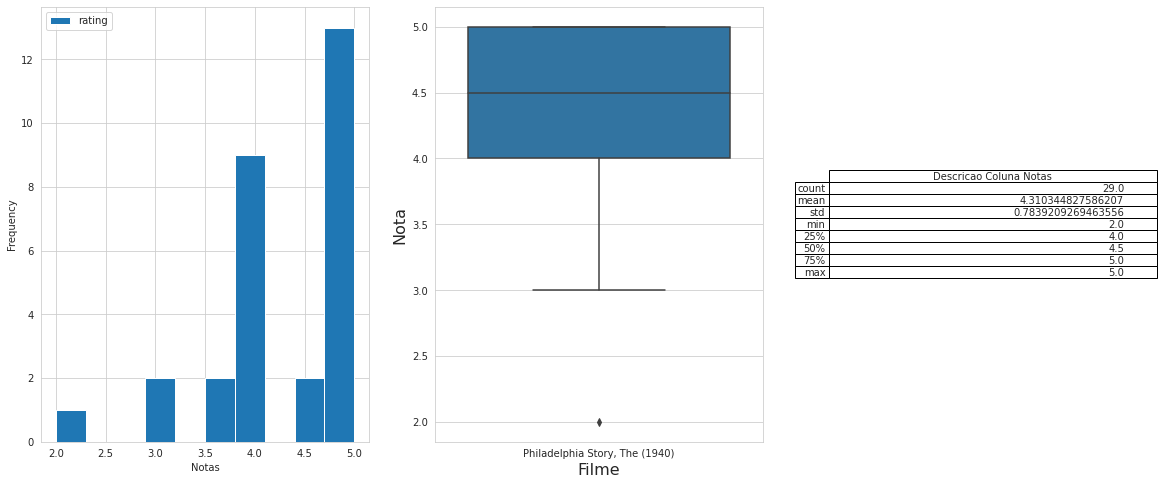

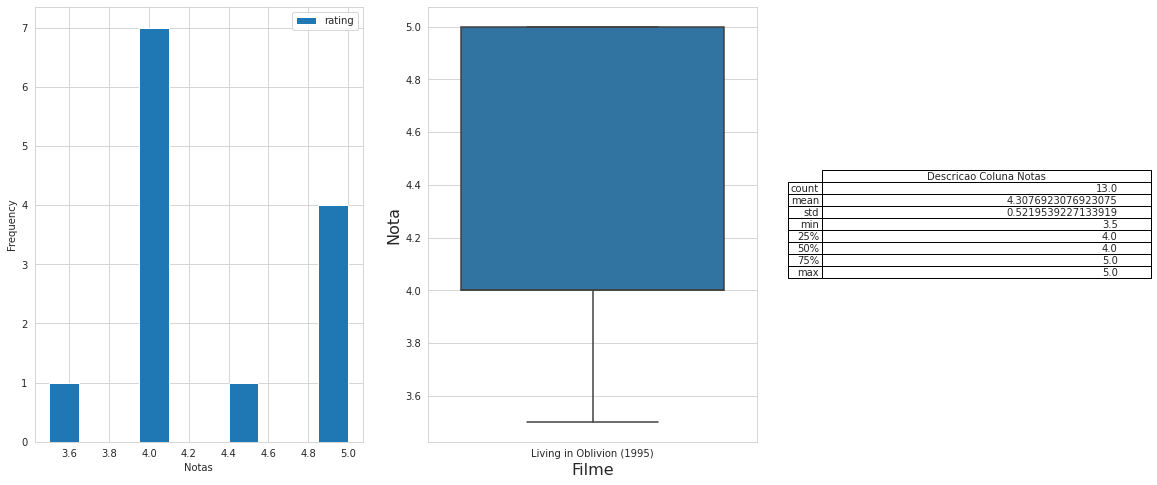

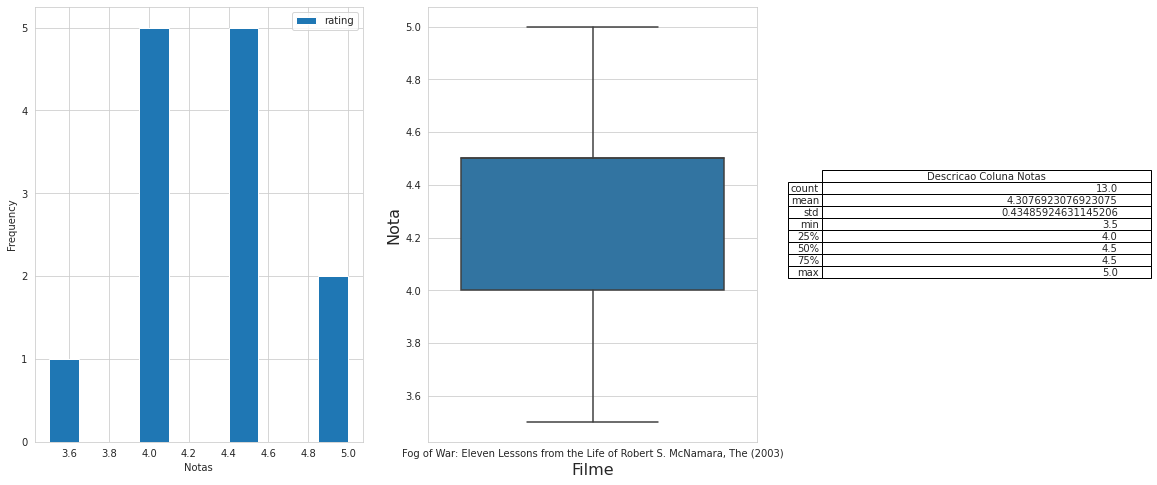

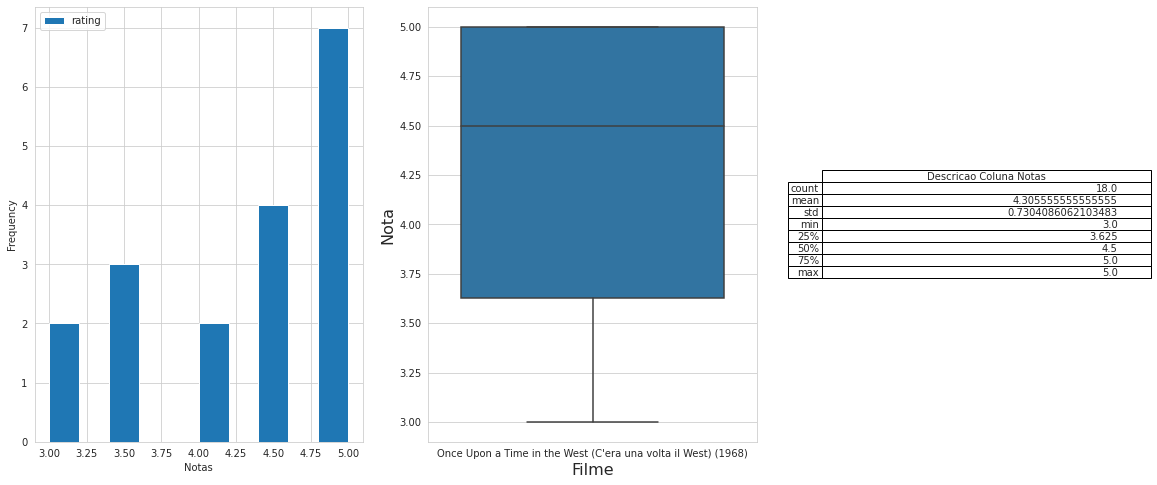

In [60]:
media_filmes_nao_redonda = filmes_com_media.query("nota_media > 4.3 and nota_media < 4.33").sort_values("nota_media",ascending=False)

for id_filme in media_filmes_nao_redonda["movieId"]:
  plot_filme(id_filme)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
def box_plot_top_dez(n):
  fig, axs = plt.subplots(1,2,figsize=(20,8))
  
  notas_do_filme = ratings.query(f"movieId=={n}")
  nome_do_filme = movies.query(f"movieId=={n}")["title"]
  plot_box = sns.boxplot(data=notas_do_filme,x='movieId',y='rating', ax=axs[0])
  plot_box.set_xticklabels('Notas')
  plot_box.set_xlabel("Filme", fontsize=16)
  plot_box.set_ylabel("Nota", fontsize=16)
  plot_box.set_xticklabels(nome_do_filme,fontsize=12)

  summary = notas_do_filme.describe()["rating"].to_frame()
  plot_table = axs[1].table(cellText=summary.values,
          rowLabels=summary.index,
          colLabels=["Descricao Coluna Notas"],
          cellLoc = 'right', rowLoc = 'right',
          loc='center')
  axs[1].axis("off") 
  
  plt.show()
  print('\n')
  return 

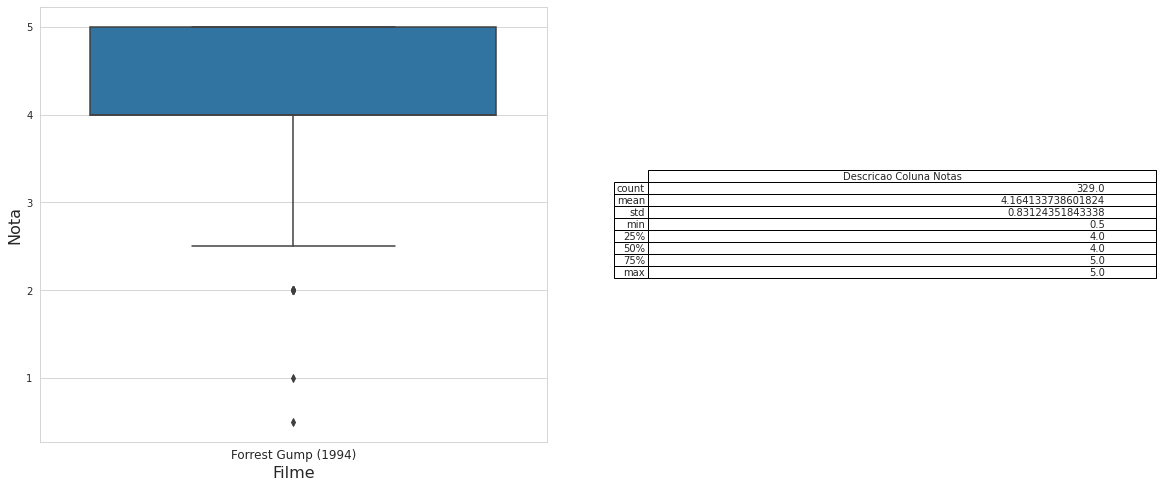

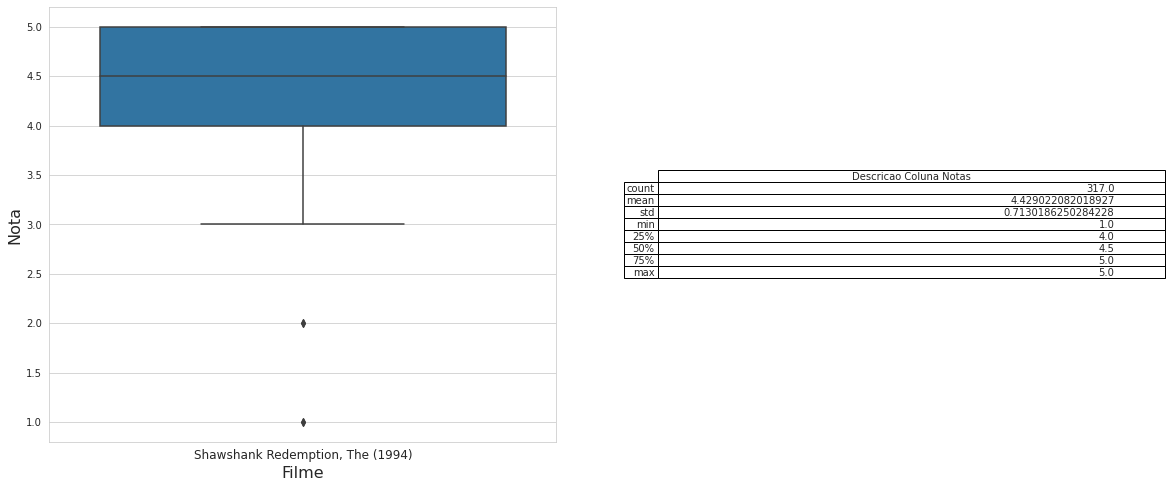

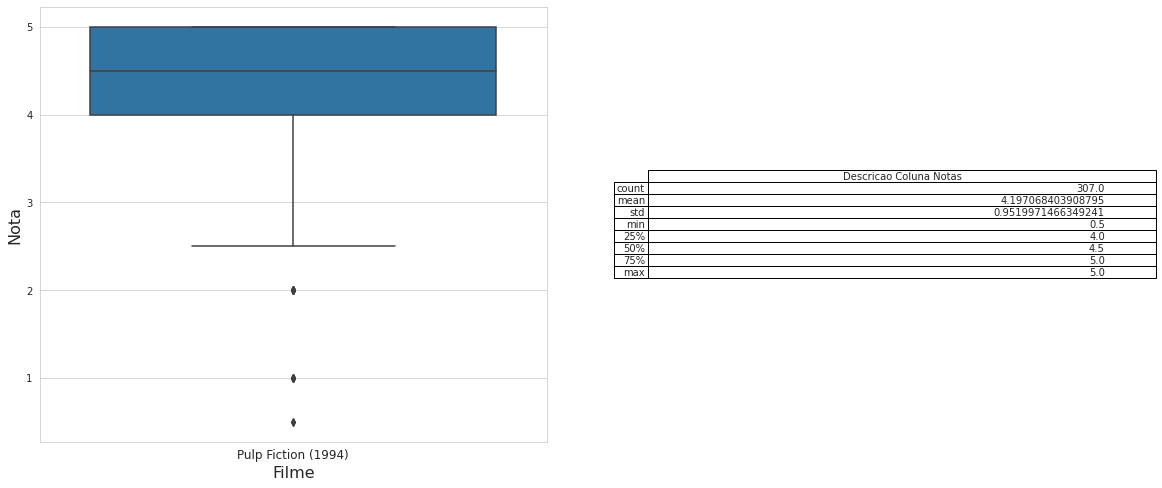

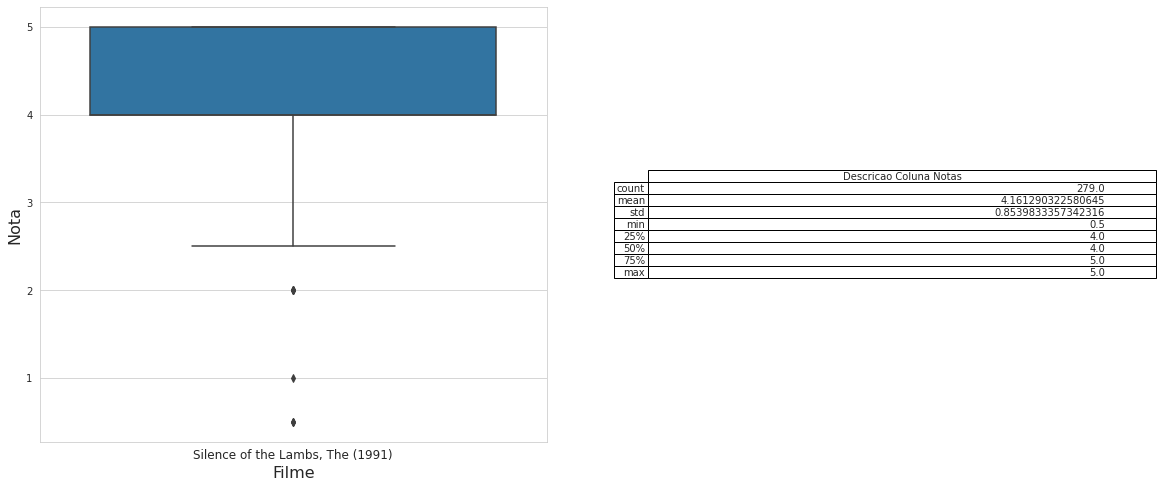

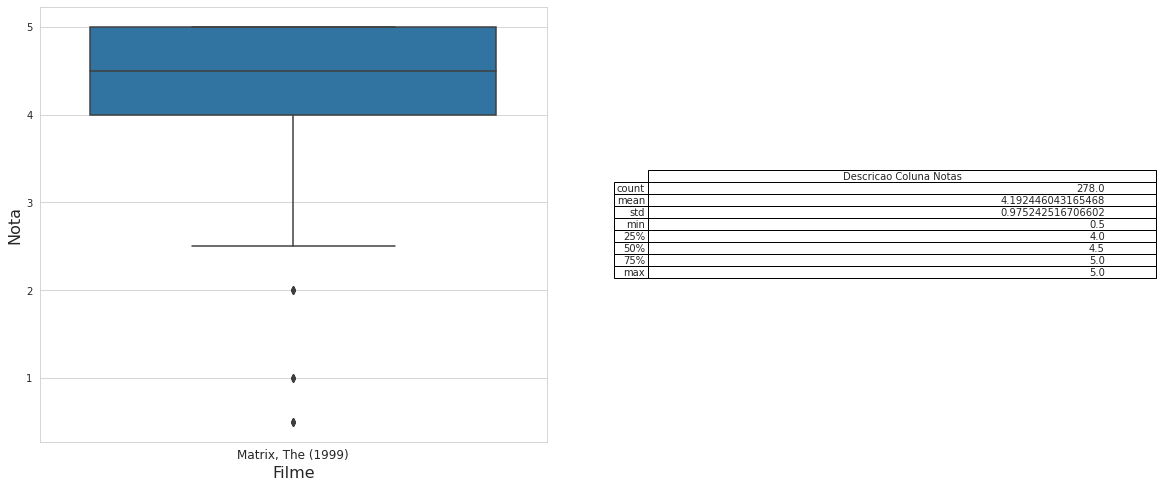

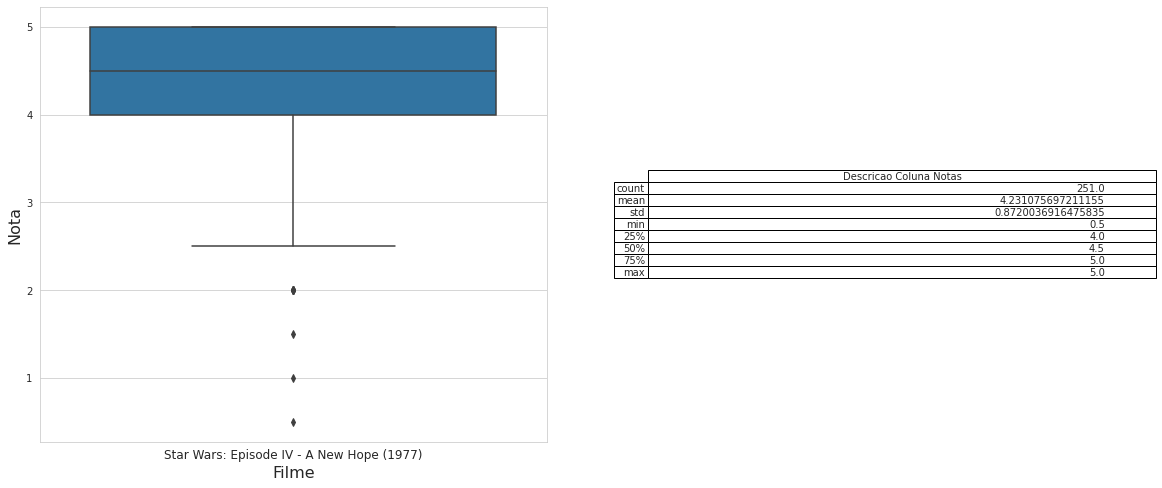

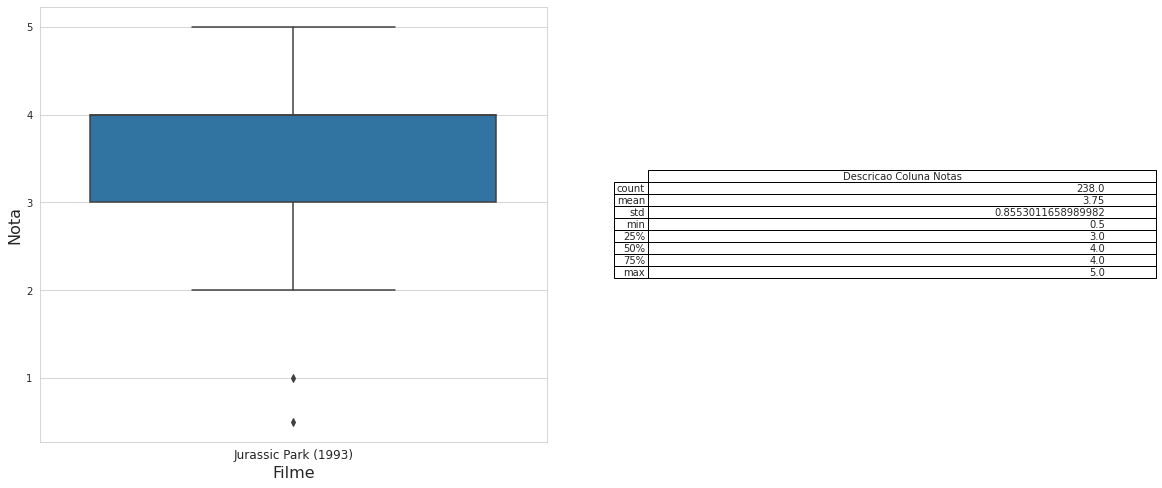

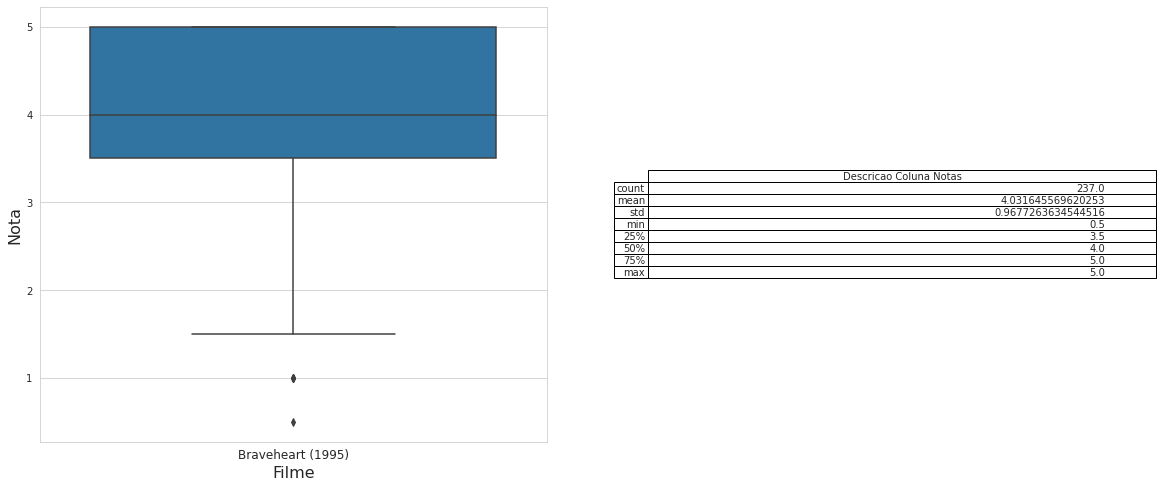

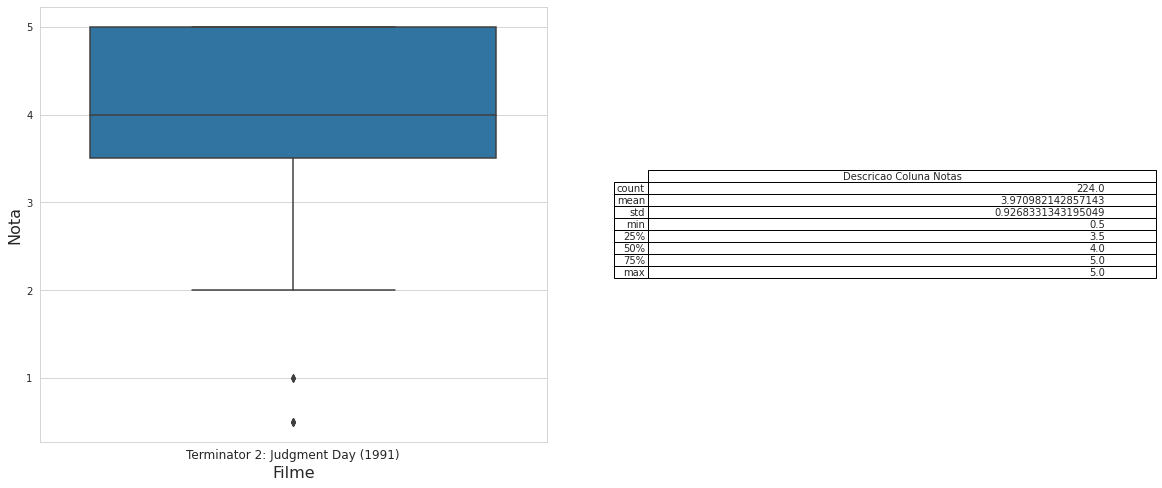

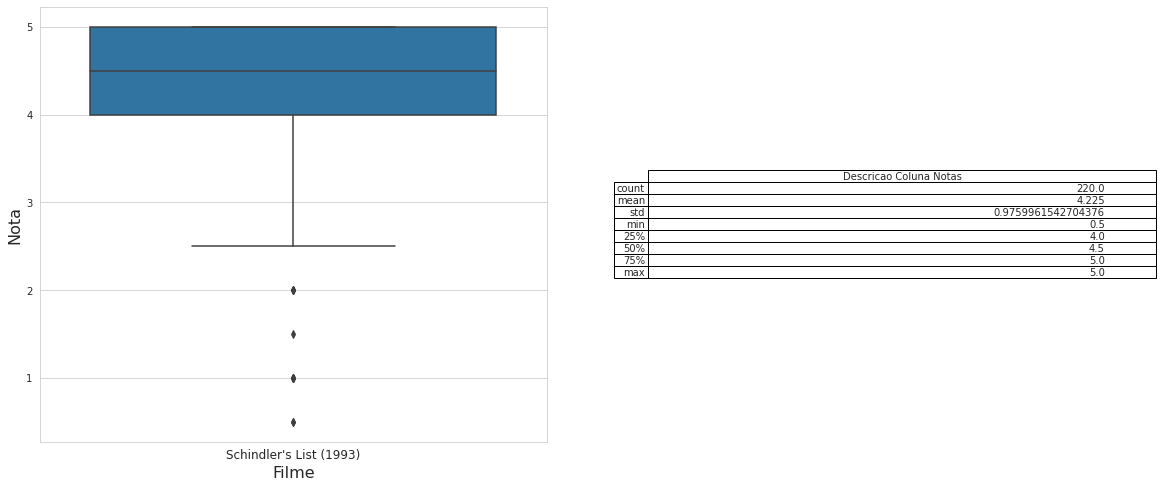

In [74]:
top_dez_votos = contagem_notas.sort_values(by="countRating",ascending=False).head(10)

for id_filme in top_dez_votos.index:
  box_plot_top_dez(id_filme)



## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [0]:
def box_plot_top_dez_notas_com_nome():
  top_dez_votos = movies_with_count.sort_values("countRating",ascending=False).head(10)
  top_dez_votos_ids = top_dez_votos["movieId"].to_list()
  top_dez_votos_titulos = top_dez_votos["title"].to_list()

  plot_box = sns.boxplot(data=ratings.query(f"movieId in {top_dez_votos_ids}"),x="movieId",y="rating")
  plot_box.set_xticklabels(top_dez_votos_titulos)
  plot_box.set_xlabel("Filme", fontsize=16)
  plot_box.set_ylabel("Nota", fontsize=16)
  plt.xticks(rotation=45)
    
  plt.show()
  print('\n')
  return 

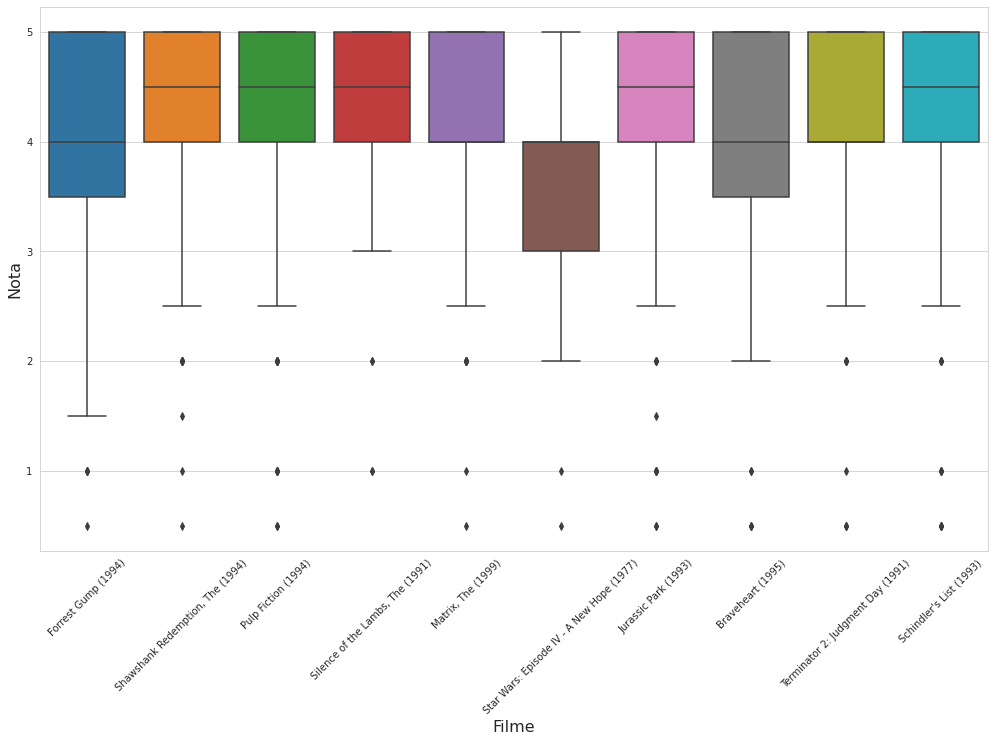

In [161]:
box_plot_top_dez_notas_com_nome()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def moda_media_mediana(n):
  mediana = ratings.query(f"movieId=={n}")["rating"].median()
  media = ratings.query(f"movieId=={n}")["rating"].mean()
  moda = ratings.query(f"movieId=={n}")["rating"].mode().values
  nome_do_filme = movies.query(f"movieId=={n}")["title"]

  '''
  print("Filme: ", nome_do_filme.values[0])
  print("Media: ", media)
  print("Mediana: ", mediana)
  print("Moda: ", moda)
  print("\n")
  '''

  table = pd.DataFrame(np.array([["Media:",media], ["Mediana:", mediana], ["Moda:", moda]]),
                   columns=['Titulo:',nome_do_filme.values[0]])
  
  print(table.to_string(index=False))
  print("")
  return

In [194]:
filmes_proximos = filmes_com_media.query("(nota_media >= 0.5 and nota_media < 0.6) or (nota_media > 2.7 and nota_media < 3.3) or (nota_media > 4.6 and nota_media < 5)")

for id_filme in filmes_proximos["movieId"][15:25]:
  moda_media_mediana(id_filme)

  Titulo: Restoration (1995)
   Media:             3.1875
 Mediana:                  3
    Moda:              [3.0]

  Titulo: How to Make an American Quilt (1995)
   Media:                              3.06667
 Mediana:                                    3
    Moda:                                [3.0]

  Titulo: Pocahontas (1995)
   Media:           3.14706
 Mediana:                 3
    Moda:             [3.0]

  Titulo: When Night Is Falling (1995)
   Media:                            3
 Mediana:                            3
    Moda:                        [3.0]

  Titulo: Home for the Holidays (1995)
   Media:                       3.0625
 Mediana:                            3
    Moda:                        [3.0]

  Titulo: Indian in the Cupboard, The (1995)
   Media:                            3.23529
 Mediana:                                  3
    Moda:                         [3.0, 4.0]

  Titulo: Don't Be a Menace to South Central While Drinking Your Juice in the Hood (19

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

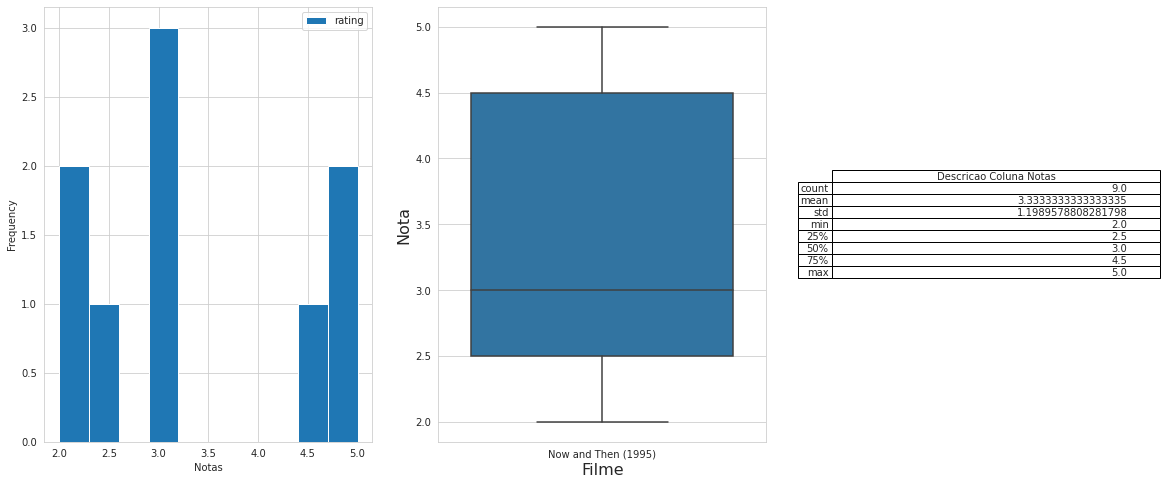

In [195]:
plot_filme("27")

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

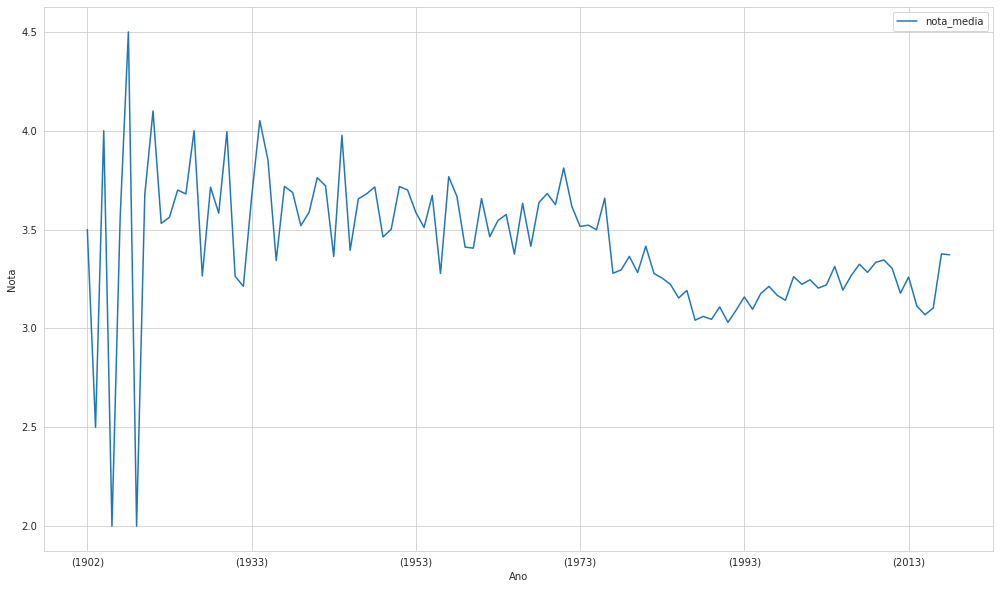

In [227]:
filmes_ano = filmes_com_media.copy()

filmes_ano["title"] = filmes_ano["title"].str.extract('(\([0-9]{4}\))',expand=False).dropna()

ratings[['userId']].groupby(ratings['movieId']).count()

filmes_ano_media = filmes_ano[['nota_media']].groupby(filmes_ano["title"]).mean()

medias_ano = filmes_ano_media["nota_media"].sort_values(ascending=False).to_frame().sort_index()

medias_ano_plot = medias_ano.plot()

medias_ano_plot.set_xlabel("Ano")
medias_ano_plot.set_ylabel("Nota")

medias_ano_plot